In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [3]:
df.head()

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,...,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,...,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.739990,0.292,3340.969971,0.393
1,1,2020-03-24,CNC,Centene Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585022400,Nevada,Democratic,...,0.254,2447.330078,2797.800049,0.143,2955.449951,0.208,3083.760010,0.260,3319.469971,0.356
2,2,2020-03-31,DG,Dollar General Corporation,purchase,"$1,001 - $15,000",Susie Lee,1585627200,Nevada,Democratic,...,0.380,2584.590088,2912.429932,0.127,3055.729980,0.182,3130.010010,0.211,3298.459961,0.276
3,3,2020-02-21,ENV,"Envestnet, Inc",sale_partial,"$1,001 - $15,000",Susie Lee,1582261200,Nevada,Democratic,...,0.016,3337.750000,2237.399902,-0.330,2799.310059,-0.161,2991.770020,-0.104,3389.780029,0.016
4,4,2020-03-17,LKQ,LKQ Corporation,sale_partial,"$1,001 - $15,000",Susie Lee,1584417600,Nevada,Democratic,...,0.633,2529.189941,2799.550049,0.107,2863.699951,0.132,3115.340088,0.232,3340.969971,0.321


In [4]:
df.columns

Index(['level_0', 'transaction_date', 'ticker', 'asset_description', 'type',
       'amount', 'representative', 'timestamp', 'state', 'party_x',
       'total_senate_years', 'total_house_years', 'total_years',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'start', 'day_30', 'day_30_stock_perc_diff',
       'day_60', 'day_60_stock_perc_diff', 'day_90', 'day_90_stock_perc_diff',
       'day_180', 'day_180_stock_perc_diff', 'sp_start', 'sp_30',
       'sp_30_sp_perc_diff', 'sp_60', 'sp_60_sp_perc_diff', 'sp_90',
       'sp_90_sp_perc_diff', 'sp_180', 'sp_180_sp_perc_diff'],
      dtype='object')

In [5]:
trades_return_data = df[['representative', 'day_180_stock_perc_diff']]
trades_return_data

,representative,day_180_stock_perc_diff
0,Susie Lee,0.321
1,Susie Lee,0.254
2,Susie Lee,0.380
3,Susie Lee,0.016
4,Susie Lee,0.633
...,...,...
10076,Susan M Collins,0.041
10077,Susan M Collins,-0.008
10078,Susan M Collins,0.272
10079,Susan M Collins,-0.082


In [6]:
trades_count = pd.DataFrame(trades_return_data.groupby(['representative']).size(), columns = ['Transactions'])
trades_count

,Transactions
representative,
"A. Mitchell Mcconnell, Jr.",13
Adam Kinzinger,23
Alan S. Lowenthal,303
"Angus S King, Jr.",27
Anthony E. Gonzalez,2
...,...
Virginia Foxx,30
W. Greg Steube,2
William Cassidy,142


In [7]:
avg_return = trades_return_data.groupby(['representative']).mean()

In [8]:
avg_return

,day_180_stock_perc_diff
representative,
"A. Mitchell Mcconnell, Jr.",-0.027538
Adam Kinzinger,0.342304
Alan S. Lowenthal,0.597287
"Angus S King, Jr.",0.031037
Anthony E. Gonzalez,0.334500
...,...
Virginia Foxx,-0.035333
W. Greg Steube,0.114000
William Cassidy,0.103408


In [9]:
#What I did above didn't work for some reason
avg_return_df = pd.DataFrame(avg_return)
avg_return_df

,day_180_stock_perc_diff
representative,
"A. Mitchell Mcconnell, Jr.",-0.027538
Adam Kinzinger,0.342304
Alan S. Lowenthal,0.597287
"Angus S King, Jr.",0.031037
Anthony E. Gonzalez,0.334500
...,...
Virginia Foxx,-0.035333
W. Greg Steube,0.114000
William Cassidy,0.103408


In [10]:
avg_return_df.rename(columns = {'day_180_stock_perc_diff':'Average 180 Day Return'}, inplace=True)
avg_return_df

,Average 180 Day Return
representative,
"A. Mitchell Mcconnell, Jr.",-0.027538
Adam Kinzinger,0.342304
Alan S. Lowenthal,0.597287
"Angus S King, Jr.",0.031037
Anthony E. Gonzalez,0.334500
...,...
Virginia Foxx,-0.035333
W. Greg Steube,0.114000
William Cassidy,0.103408


In [11]:
trades_return_graph = pd.concat([trades_count, avg_return_df], axis=1)
trades_return_graph

,Transactions,Average 180 Day Return
representative,,
"A. Mitchell Mcconnell, Jr.",13,-0.027538
Adam Kinzinger,23,0.342304
Alan S. Lowenthal,303,0.597287
"Angus S King, Jr.",27,0.031037
Anthony E. Gonzalez,2,0.334500
...,...,...
Virginia Foxx,30,-0.035333
W. Greg Steube,2,0.114000
William Cassidy,142,0.103408


<AxesSubplot:xlabel='Transactions', ylabel='Average 180 Day Return'>

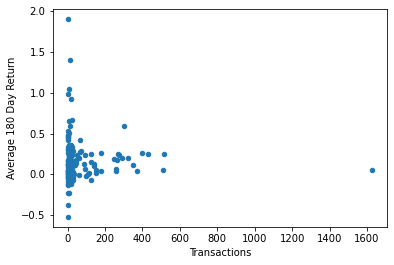

In [12]:
trades_return_graph.plot.scatter(x='Transactions', y='Average 180 Day Return')

**Interpretation**

 the number of trades versus the average return per congress member. It shows no relationship between the two.